<a href="https://colab.research.google.com/github/bellaabdelouahab/Colab-Notebooks/blob/main/intrusion_detection_system_cicids2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# kaggle datasets download -d mozillaorg/common-voice

from google.colab import files
files.upload() #upload kaggle.json
! pip install -q kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions -h
!kaggle competitions download -c DATASET

In [ ]:
! kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
yasserh/wine-quality-dataset                                     Wine Quality Dataset                                21KB  2022-01-15 19:15:11           8351        312  1.0              
mkoklu42/pistachio-dataset                                       Pistachio Dataset                                    2MB  2022-02-11 21:06:50            156        572  0.8125           
mkoklu42/grapevine-leaves-image-dataset                          Grapevine Leaves Image Dataset                     109MB  2022-02-09 18:21:40            134        560  0.8125           
mkoklu42/pumpkin-seeds-dataset                              

In [ ]:
!where cicids2017.zip

/bin/bash: where: command not found


In [ ]:
!kaggle datasets download -d cicdataset/cicids2017

cicids2017.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
kaggle datasets download -d hassan06/nslkdd

In [ ]:
!ls
# !mkdir train
!unzip cicids2017.zip -d train

 cicids2017.zip    'kaggle (2).json'   sample_data
'kaggle (1).json'   kaggle.json        train
Archive:  cicids2017.zip
replace train/MachineLearningCSV.md5? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# !cd train
!ls train/MachineLearningCSV/MachineLearningCVE/

Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv


In [ ]:
import pandas as pd
df = pd.read_csv("train/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")


In [ ]:
df.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
for i in range(len(df.columns)):
  df = df[df[df.columns[i]].notna()]

In [ ]:
def NormalizeData(Data,Max,Min):
        return (Data - Min )/ (Max - Min)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_ = df.drop(df.columns[-1],axis=1)
Y_ = df[df.columns[-1]]
Y_.head()
Y_.value_counts()

DDoS      128027
BENIGN     97714
Name:  Label, dtype: int64

In [ ]:
for i in range(len(df.columns)):
  df = df[df[df.columns[i]].notna()]
for i in range(len(X_.columns)):
    X_[X_.columns[i]] = NormalizeData(X_[X_.columns[i]],max(X_[X_.columns[i]]),min(X_[X_.columns[i]]))

# import numpy as np
for i in range(len(X_.columns)):
  X_[X_.columns[i]].fillna(0,inplace=True)
# X_.head()



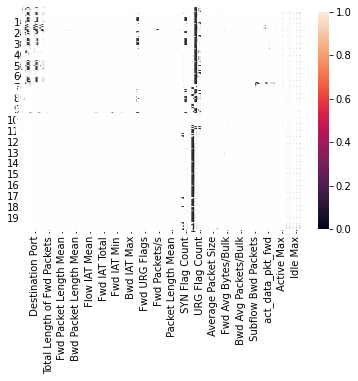

In [ ]:
import seaborn as sns
sns.heatmap(X_.head(200), annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
#split data 
X_train , X_test , y_train , y_test = train_test_split(X_,Y_, test_size=0.3)

# initualize random forest algo
Model = RandomForestClassifier(random_state=0)

Model.fit(X_train,y_train)

# Print the model score
print("score of model: ",Model.score(X_test,y_test))
print('confusin matrics :\n',confusion_matrix(Y_,Model.predict(X_)))#,'\npresicion score :',precision_score(Y_,Model.predict(X_)))

score of model:  0.9999261698389026
confusin matrics :
 [[ 97714      0]
 [     5 128022]]
